In [1]:
# 파이썬에서 주석은 샵(#)을 이용하여 작성합니다.
'''
한편, 파이썬에서 여러 줄 주석은
# 안녕
# 하세요
처럼 굳이 #을 여러 줄에 모두 붙이지 않고, 
그냥 따옴표 세 개로 코드를 감싸는 것으로 해결합니다.
근데 저는 사후적으로 주석으로 만들지 않는 이상 그냥
#을 사용하고는 합니다. 
'''
# 파이썬은 외국 사람들이 만든 코드이다 보니 영어 기반으로 작성하는 것이 편하긴 하지만,
# 한글도 생각보다 잘 지원합니다. 주석에는 한글을 마음껏 사용해도 되고, 
# 심지어는 아래처럼 변수명을 한글로 작성하는 것도 가능합니다. 
# 저는 변수명은 대개 영어로, 주석은 대개 한글로 작성하겠습니다.

안녕 = 1
print(안녕)

1


한편 저는 세미나를 위하여 일반적인 파이썬 파일 형식인 `.py`를 사용하는 대신 주피터 노트북 파일인 `.ipynb`를 사용하려 합니다. 왜냐하면, 
1. 여러분이 만약 위 코드 청크(chunk)를 클릭한 뒤 `shift + Enter`를 누르면, 코드가 실행되면서... 코드의 결과가 바로 등장합니다.
2. 제가 왜 한글을 쓰는데도 주석 표시를 안 했을까요? 주피터 노트북은 마크다운 형식을 제공합니다. R을 사용하셨던 분들은 R markdown을 생각하시면 됩니다. 더불어, 마크다운은 수식($X(X^TX)^{-1}X^T\beta$)도 매우 간편하게 쓸 수 있습니다. $\LaTeX$를 이용해서요.
3. 완결된 프로그램을 만드는 게 아니라 여러 가지 방법들을 체험해보는 것이 우리의 목표이므로, 청크-바이-청크로 코드를 수행할 수 있고, 수행 시간을 아주 간편이 확인할 수 있으며, 결과값도 즉시 확인해볼 수 있는 주피터 노트북이 매우 적당합니다. 
4. VSCode에서 주피터 노트북을 사용하는 경우, 디버그도 매우 간편히 가능하나... 저희는 안 할 예정입니다.
5. 코드의 순서를 바꾸는 걸 복붙 대신 청크 단위의 순서 변경으로 매우 간단하게 수행할 수 있습니다. 반대로 어떤 함수의 수행에 필요한 루틴(routine)을 실수로 코드 뒤에 적더라도, 그냥 그 청크를 앞으로 옮기거나, 먼저 실행시킴으로써 해결가능합니다.

다만 보시면 아시겠지만 Overleaf 등으로 적는 $\LaTeX$보다는 여러 기능이 부족합니다. 제가 알기로는 markdown은 MathJax를 이용하여 수식을 표현하는 걸로 아는데, 좀 많이 부족합니다. 우리가 수식을 좀 많이 다루다 보니, 그리고 제가 MathJax는 조금밖에 못 다루다 보니 슬라이드 자체는 $\LaTeX$로 만들고, 가끔씩 인스트럭션만 마크다운 청크로 적겠습니다. 사실 저는 R 사용자다 보니 청크가 입에 붙었는데 공식명칭은 셀(cell)입니다.

## 0. Required Packages

In [2]:
# 파이썬에서 패키지는 아래와 같이 import를 이용해 불러옵니다.
import selenium
import requests
import pandas as pd
import numpy as np

## 1. `selenium`으로 크롤링하기

한국은행은 한국은행 경제통계시스템 ECOS를 통하여 각 통계의 통계공표일을 공시하고 있습니다(https://ecos.bok.or.kr/#/StatisticsSchedule). 갑자기 어느날 국제경제론 수업에서는 한국은행에서 공시한 국제수지를 확인하고 분석해 오라는 과제를 내 주셨습니다. 분석 기간은 2014년 1월부터 2023년 12월까지로 정해 주셨습니다. 이 데이터를 어떻게 다운로드 받아야 할까요? 10년 동안, 12개월에 대해 나오는 120개의 데이터를 일일이 클릭해서 다운로드받아야 할까요? 아니면 크롤링을 통해 간편히 다운로드받을까요? 만약 120개가 아니라 1000개, 10000개라면 어떡할까요? 다 클릭할 수는 없는 노릇입니다. 만약 파일 이름까지 추후 데이터분석을 위하여 통일하라고 하시면 어떻게 하실 건가요? 올라와 있는 파일 이름까지 하나하나 다 타이핑하실 건가요? 태스크가 복잡해지고 데이터의 개수가 많아질수록, 크롤링이 훨씬 이득입니다.

### ECOS에 접근하는 웹 드라이버 만들기

In [47]:
# selenium은 webdriver api를 통해 브라우징합니다.
# 한편 패키지에서 특정 모듈을 불러오려면 아래처럼 from-import를 사용합니다.
from selenium import webdriver
import chromedriver_binary
from selenium.webdriver.chrome.options import Options
chrome_options = Options()
chrome_options.add_argument("--disable-popup-blocking")
chrome_options.add_argument("--disable-extensions")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_experimental_option("prefs", {
    "download.default_directory": "./data"
})

# 사이트를 바꾸시는 경우, 꼭 크롤링 가능여부를 확인해 주세요.
parkdriver = webdriver.Chrome(options = chrome_options)


# 사이트 로딩을 위해 컴퓨터에게 주는 휴식시간은 20초입니다.
parkdriver.implicitly_wait(20)

# 한국은행 경제통계시스템 홈페이지에 접근하였다면 성공
# parkdriver 개체는 Chrome에서 브라우징을 하는 드라이버입니다.
# .get('링크')는 '링크'에 크롬을 통하여 접근하는 함수입니다.
parkdriver.get("https://ecos.bok.or.kr/")

### 국제수지에 접근하기

In [48]:
# 특정 통계를 찾는 가장 편한 방법은 검색입니다.
# 검색창에 접근하여 봅시다.
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

# selenium에서 By로써 어떤 키워드를 통해 개체를 찾을지 결정할 수 있습니다.

# 우리는 xpath를 사용하여 검색하겠습니다.
searchConsole = parkdriver.find_element(By.XPATH, '//*[@id="root"]/div[5]/div/div[2]/div[1]/div/div[1]/div[1]/div/div[1]/div/input')
# 타이핑
searchConsole.send_keys('국제수지')
# 엔터(리턴)
searchConsole.send_keys(Keys.ENTER)
# 주의: 그냥 하면 되는거 왜 굳이 이렇게 하냐 => 기본 문법을 배우기 위함입니다.
# 만약 교수님께서 갑자기 특정 논문 리스트를 주시고 이거 다 다운받아와라 하시면 검색도 여러 번 해야 할 수 있습니다.

In [49]:
# 이제 페이지가 국제수지 검색결과로 바뀌었습니다.
# 국제수지 클릭
balance = parkdriver.find_element(By.XPATH, '//*[@id="root"]/div[5]/div/div/div[4]/div[2]/div[2]/div/div/ul[1]/li/div[1]/div/div[2]/a/span[1]/mark/mark/mark/mark')
balance.click()

In [51]:
# 이제 통계페이지로 왔습니다.
# 여기서 보시면 아시겠지만 링크는 어떤 통계든 상관없이 https://ecos.bok.or.kr/#/SearchStat
# 입니다. 즉 이 페이지는 검색/클릭 등으로만 접근 가능하며, 링크로 접근이 어렵습니다. 
# 맨날 어디있었지... 그 자료... 찾는 것보다, 이런 파일 하나 저장해 두시면 그냥 쭉쭉 실행하면
# 원하는 페이지에 잘 갈 수 있습니다. (사실 한국은행 경제통계시스템은 링크도 지원하긴합니다ㅎㅎ;)

# 빠른 조회 버튼을 통해 직사각형 표를 로드해 보겠습니다.
rapid = parkdriver.find_element(By.XPATH, '//*[@id="centerDiv"]/div/div/div/div[2]/div/div[2]/div/div[3]/div/button[1]')
rapid.click()

### 원하는 자료 형태로 커스텀하기

In [52]:
# 이 루틴은 국제수지만이 아니라 다양한 자료에 사용가능합니다. 

# 먼저 시작년월을 2014-01로 바꾸어 볼까요?
startmonth = parkdriver.find_element(By.XPATH, '//*[@id="centerDiv"]/div/div[1]/div[2]/div[1]/div/div[1]/div[2]/div/div/div/div/div[1]/div/div')
'''
startmonth.send_keys('2014-01') # ERROR!
'''
# 시작년월에 직접 접근하려면 에러가 납니다.(not interactible)
# 이는 시작년월의 html class인 react-data-picker__inputGroup의 구조 때문입니다.
# 그 값은 현재 == $0으로 관리되고 있어서, value가 2014-01같은 이상한 값이 될 수 없습니다.
# 해당 class 안의 input으로 year, month 등이 들어가는 구조입니다.

# 첫째 방법은 우리가 직접 클릭하듯이 interactible element를 계속 click해서 접근하는 겁니다.
# 일단 우리가 클릭을 꼭 해야 하는 게 아닌 이상 숫자면 비추하는 방법이기는 합니다.
# 위로 스크롤
parkdriver.execute_script("window.scrollTo(0, 0);")
startmonth.click()
prevbutton = parkdriver.find_element(By.XPATH, '//*[@id="centerDiv"]/div/div[1]/div[2]/div[1]/div/div[1]/div[2]/div/div/div/div/div[1]/span/div/div/div[1]/button[1]')
prevbutton.click()
# 주의: 만약 데이터에 다른 2014가 있었다면... 이런 방법으로 나온 button2014가 유효한가?
button2014 = parkdriver.find_element(By.XPATH, "//*[contains(text(), '2014')]")
button2014.click()
# 1월 찾기?
'''
buttonjan = parkdriver.find_element(By.XPATH, "//*[contains(text(), '1')]")
buttonjan = parkdriver.find_elements(By.XPATH, "//*[contains(text(), '1')]")
'''
# 이렇게 여러 클릭을 거쳐 나오는 요소는 찾기가 정말 오래 걸리고, 힘듭니다.
# 다행히도 한은은 aria-level을 unique하게 결정해 주었습니다.
# 특정 밸류가 같은 element를 고르려면 By.CSS_SELECTOR 옵션을 사용해주면 됩니다.
# 그 조상에게 가려면 By.XPATH에서 '..'을 이용하면 됩니다.
buttonjan = parkdriver.find_element(By.CSS_SELECTOR, "[aria-label='2014년 1월']")
buttonjan.find_element(By.XPATH, "..").click()


In [53]:
# 둘째 방법은 해당 class를 구성하는 더욱 세부적인 요소까지 들어가서 바꿔주는 겁니다. 
startyear = parkdriver.find_element(By.XPATH, '//*[@id="centerDiv"]/div/div[1]/div[2]/div[1]/div/div[1]/div[2]/div/div/div/div/div[2]/div/div/input[2]')
startyear.send_keys('2023')
startmonth_in = parkdriver.find_element(By.XPATH, '//*[@id="centerDiv"]/div/div[1]/div[2]/div[1]/div/div[1]/div[2]/div/div/div/div/div[2]/div/div/input[3]')
startmonth_in.send_keys('12')

In [54]:
# 검색 버튼 클릭하겠습니다
searchbtn = parkdriver.find_element(By.XPATH, '//*[@id="centerDiv"]/div/div[1]/div[2]/div[1]/div/div[3]/div[3]/button')
searchbtn.click()

### 다운로드 받기

In [55]:
# 다운로드 받아보겠습니다
parkdriver.execute_script("window.scrollTo(0, 10);")
download = parkdriver.find_element(By.XPATH, '//*[@id="centerDiv"]/div/div[2]/div/div/div/div/div/div[2]/div/div[1]/div[1]/div/div/div/div[5]/button')
download.click()
csv = parkdriver.find_element(By.XPATH, '//*[@id="centerDiv"]/div/div[2]/div/div/div/div/div/div[2]/div/div[2]/div/div/div[2]/div/div/div/div/div/div[3]/label')
csv.click()
downbutton = parkdriver.find_element(By.XPATH, '//*[@id="centerDiv"]/div/div[2]/div/div/div/div/div/div[2]/div/div[2]/div/div/div[3]/button[2]')
downbutton.click()

In [56]:
# 파일 이름을 우리의 입맛대로 변경해보겠습니다.
import os, shutil

filepath = "./data"
filename = max([filepath + '/' + f for f in os.listdir(filepath)], key=os.path.getctime)
shutil.move(os.path.join(filepath, filename), './data/국제수지_201401_202312.csv')

'C:/서울대학교/SFERS/2024-1/교육세션/data/국제수지_201401_202312.csv'

## 2. `requests`로 크롤링하기

앞에서 `selenium`을 이용할 때에는 어떠한 한 파일을 인터랙티브하게 다운로드 받는 방법을 알아 보았습니다. 그래서 크롤링에 자신만만해진 순간, 어떤 교수님께서 주식시장을 분석하기 위해 한국거래소에서 주식 관련 파일들을 다운로드받아달라고 하십니다. 심지어 KOSPI에 소속된 953개 종목에 대해서요! 다행히도 교수님께서 주신 `stock_list.csv` 파일에는 953개 종목의 종목코드, 종목명 등이 써 있습니다. 교수님께서 이 953개 종목의 개별정목 외국인 보유수량, 한도수량 등을 알아봐 달라고 하시네요. 마찬가지로 기간은 2014년 01월부터 2023년 12월까지입니다. `selenium`을 사용해보려 하였으나, 시스템 로딩 시간이 너무 오래걸리네요... 반복 작업을 조금 더 쉽게 할 수 있는 방법이 없을까요? 우리는 `requests`를 통해 이를 수행해보려 합니다.

### Required Packages and Files

In [10]:
# 우리는 부하를 주는 것을 피하기 위해 5개 종목에 대해서만 해보려 합니다.
import requests
import pandas as pd
from pandas import DataFrame, Series
from io import BytesIO

stock_dataframe = pd.read_csv('./data/stock_list.csv', encoding= 'euc-kr').iloc[0:5]
stock_name_list = stock_dataframe['한글 종목약명']
std_code_list = stock_dataframe['표준코드']
code_list = stock_dataframe['단축코드']

In [11]:
stock_dataframe

,표준코드,단축코드,한글 종목명,한글 종목약명,영문 종목명,상장일,시장구분,증권구분,소속부,주식종류,액면가,상장주식수
0,KR7095570008,095570,AJ네트웍스보통주,AJ네트웍스,"AJ Networks Co.,Ltd.",2015/08/21,KOSPI,주권,NaN,보통주,1000,45252759
1,KR7006840003,006840,AK홀딩스보통주,AK홀딩스,"AK Holdings, Inc.",1999/08/11,KOSPI,주권,NaN,보통주,5000,13247561
2,KR7282330000,282330,BGF리테일보통주,BGF리테일,BGF Retail,2017/12/08,KOSPI,주권,NaN,보통주,1000,17283906
3,KR7027410000,027410,BGF보통주,BGF,BGF,2014/05/19,KOSPI,주권,NaN,보통주,1000,95716791
4,KR7138930003,138930,BNK금융지주보통주,BNK금융지주,BNK Financial Group Inc.,2011/03/30,KOSPI,주권,NaN,보통주,5000,322088438


### Requests를 통해 특정 종목코드의 파일을 불러오기

In [14]:
# foreign
def foreign_data(stock_name, std_code, code, start_day, end_day):
    """
    특정 기간동안의 외국인 정보를 데이터프레임 형태로 저장
    """
    
    gen_otp_url = 'http://data.krx.co.kr/comm/fileDn/GenerateOTP/generate.cmd'
    
    gen_otp_data = {
    'locale': 'ko_KR',
    'searchType': 2,
    'mktld': 'ALL',
    'trdDd': '20240214',
    'tboxisuCd_finder_stkisu0_3': code + '/' + stock_name,
    'isuCd': std_code,
    'isuCd2': '',
    'codeNmisuCd_finder_stkisu0_1': stock_name,
    'param1isuCd_finder_stkisu0_1': 'ALL',
    'strtDd': start_day,
    'endDd': end_day,
    'share': '1',
    'csvxls_isNo': 'false',
    'name': 'fileDown',
    'url': 'dbms/MDC/STAT/standard/MDCSTAT03702',
    }

    headers = {'Referer' : 'http://data.krx.co.kr/contents/MDC/MDI/mdiLoader'}
    otp = requests.post(gen_otp_url, gen_otp_data, headers=headers).text

    down_url = 'http://data.krx.co.kr/comm/fileDn/download_csv/download.cmd'
    down_foreign = requests.post(down_url, {'code':otp}, headers=headers)

    stock_foreign = pd.read_csv(BytesIO(down_foreign.content), encoding='cp949')
    
    return stock_foreign

### CSV 파일로 저장하기

In [17]:
def foreign_csv(stock_name, std_code, code):
    start_day = '20140101'
    end_day = '20231231'

    temp_data = foreign_data(stock_name, std_code, code, start_day, end_day)
    temp_data.index.name = 'time'
    temp_data.columns = ['time', 'finprice', 'contrast', 'return', 'numOfStock', 'fore_vol', 'fore_ratio', 'fore_limit', 'fore_limit_rate']

    temp_data.to_csv("./data/" + stock_name + '_20140101_20231231.csv', index = False)

In [18]:
### 5개 파일에 대한 반복문으로 저장하기
import time

for i in range(5):
    time.sleep(2)
    foreign_csv(stock_name_list[i], std_code_list[i], code_list[i])

## 3. Data Wrangling(1): Basic Operations

In [3]:
# 파일 불러오기
balance = pd.read_csv('./data/국제수지_201401_202312.csv')

In [4]:
pd.__version__

'2.1.1'

### Basics

In [5]:
balance.size # 35836
balance.shape # (289, 124) # 289 * 124 = 35836
balance['2014/01'] # list of 289 numerical values
balance.통계표 # list of 289 strings
'2014/01' in balance # True
'2013/12' in balance # False
balance.keys() # Index(['통계표', '국제수지(BPM6)', ...])
balance

,통계표,국제수지(BPM6),단위,변환,2014/01,2014/02,2014/03,2014/04,2014/05,2014/06,...,2023/03,2023/04,2023/05,2023/06,2023/07,2023/08,2023/09,2023/10,2023/11,2023/12
0,2.5.1.1. 국제수지,경상수지,백만달러,원자료,"1,837.7","4,812.5","6,182.8","6,875.5","9,148.3","7,768.8",...,-429.4,"-1,372.7","2,300.8","6,177.8","4,113.9","5,412.7","6,072.7","7,437.8","3,890.7","7,414.6"
1,2.5.1.1. 국제수지,상품수지,백만달러,원자료,"3,674.4","5,930.7","7,450.3","9,833.7","8,560.9","6,088.3",...,"-1,181.0",612.5,"1,883.6","3,913.3","4,427.5","5,201.4","7,486.3","5,433.3","6,878.2","8,037.4"
2,2.5.1.1. 국제수지,상품수출,백만달러,원자료,"50,146.9","47,635.1","53,781.8","56,121.5","51,988.7","49,982.2",...,"56,582.6","49,284.7","53,055.4","54,133.0","50,247.2","53,668.9","56,102.5","57,779.9","56,398.4","59,003.9"
3,2.5.1.1. 국제수지,상품수입(FOB),백만달러,원자료,"46,472.5","41,704.4","46,331.5","46,287.8","43,427.8","43,893.9",...,"57,763.6","48,672.2","51,171.8","50,219.7","45,819.7","48,467.5","48,616.2","52,346.6","49,520.2","50,966.5"
4,2.5.1.1. 국제수지,일반상품수지,백만달러,원자료,"2,242.9","4,672.4","5,950.6","8,113.3","6,940.1","4,694.7",...,"-2,677.4",-715.7,380.7,"2,658.5","3,212.1","3,772.5","6,360.4","3,818.3","5,323.7","6,240.8"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2.5.1.1. 국제수지,비금융기업등,백만달러,원자료,-0.1,2.7,0.1,-0.1,0.0,0.4,...,1.1,-0.7,1.0,-0.3,4.0,1.4,7.5,2.3,-0.5,1.4
285,2.5.1.1. 국제수지,기타지분(부채),백만달러,원자료,109.1,0.0,0.0,-12.1,27.4,-12.9,...,0.0,-31.5,-5.1,-34.6,-40.4,-11.6,0.0,-46.2,0.0,0.0
286,2.5.1.1. 국제수지,특별인출권,백만달러,원자료,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
287,2.5.1.1. 국제수지,준비자산,백만달러,원자료,"2,906.7","2,325.0","1,792.0",665.8,"5,967.7","4,536.1",...,"-1,146.6",12.2,"-3,314.3",363.6,"-1,466.2","-1,591.8","-1,235.5",-40.7,617.7,"1,395.7"


### 필요없는 행/열을 잘라내기

In [6]:
newbalance = balance.iloc[:, np.r_[1, 4:len(balance.keys())]]
newbalance

,국제수지(BPM6),2014/01,2014/02,2014/03,2014/04,2014/05,2014/06,2014/07,2014/08,2014/09,...,2023/03,2023/04,2023/05,2023/06,2023/07,2023/08,2023/09,2023/10,2023/11,2023/12
0,경상수지,"1,837.7","4,812.5","6,182.8","6,875.5","9,148.3","7,768.8","6,198.8","6,793.9","7,418.7",...,-429.4,"-1,372.7","2,300.8","6,177.8","4,113.9","5,412.7","6,072.7","7,437.8","3,890.7","7,414.6"
1,상품수지,"3,674.4","5,930.7","7,450.3","9,833.7","8,560.9","6,088.3","5,421.5","6,749.3","8,012.6",...,"-1,181.0",612.5,"1,883.6","3,913.3","4,427.5","5,201.4","7,486.3","5,433.3","6,878.2","8,037.4"
2,상품수출,"50,146.9","47,635.1","53,781.8","56,121.5","51,988.7","49,982.2","52,446.3","48,181.4","50,284.1",...,"56,582.6","49,284.7","53,055.4","54,133.0","50,247.2","53,668.9","56,102.5","57,779.9","56,398.4","59,003.9"
3,상품수입(FOB),"46,472.5","41,704.4","46,331.5","46,287.8","43,427.8","43,893.9","47,024.8","41,432.1","42,271.5",...,"57,763.6","48,672.2","51,171.8","50,219.7","45,819.7","48,467.5","48,616.2","52,346.6","49,520.2","50,966.5"
4,일반상품수지,"2,242.9","4,672.4","5,950.6","8,113.3","6,940.1","4,694.7","4,824.0","6,180.0","7,508.5",...,"-2,677.4",-715.7,380.7,"2,658.5","3,212.1","3,772.5","6,360.4","3,818.3","5,323.7","6,240.8"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,비금융기업등,-0.1,2.7,0.1,-0.1,0.0,0.4,-0.2,0.0,1.6,...,1.1,-0.7,1.0,-0.3,4.0,1.4,7.5,2.3,-0.5,1.4
285,기타지분(부채),109.1,0.0,0.0,-12.1,27.4,-12.9,-38.7,-8.7,0.0,...,0.0,-31.5,-5.1,-34.6,-40.4,-11.6,0.0,-46.2,0.0,0.0
286,특별인출권,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
287,준비자산,"2,906.7","2,325.0","1,792.0",665.8,"5,967.7","4,536.1","3,327.7",826.9,"1,677.4",...,"-1,146.6",12.2,"-3,314.3",363.6,"-1,466.2","-1,591.8","-1,235.5",-40.7,617.7,"1,395.7"


### 행과 열을 뒤집기

In [7]:
newbalance = newbalance.transpose()
newbalance

,0,1,2,3,4,5,6,7,8,9,...,279,280,281,282,283,284,285,286,287,288
국제수지(BPM6),경상수지,상품수지,상품수출,상품수입(FOB),일반상품수지,일반상품수출(FOB),일반상품수입(FOB),중계무역순수출,비화폐용금수지,비화폐용금수출(FOB),...,중앙은행,일반정부,예금취급기관,기타부문,기타금융기관,비금융기업등,기타지분(부채),특별인출권,준비자산,오차및누락
2014/01,"1,837.7","3,674.4","50,146.9","46,472.5","2,242.9","48,610.8","46,367.9","1,482.2",-50.7,53.9,...,0.0,127.6,-103.6,-0.1,0.0,-0.1,109.1,0.0,"2,906.7","1,313.5"
2014/02,"4,812.5","5,930.7","47,635.1","41,704.4","4,672.4","46,276.0","41,603.6","1,264.3",-6.0,94.8,...,0.0,288.1,475.3,0.8,-1.9,2.7,0.0,0.0,"2,325.0","1,646.7"
2014/03,"6,182.8","7,450.3","53,781.8","46,331.5","5,950.6","52,164.2","46,213.6","1,510.0",-10.3,107.6,...,0.0,199.4,-113.6,0.1,0.0,0.1,0.0,0.0,"1,792.0","-1,478.7"
2014/04,"6,875.5","9,833.7","56,121.5","46,287.8","8,113.3","54,281.5","46,168.2","1,717.4",3.0,122.6,...,0.0,-118.1,978.2,-0.1,0.0,-0.1,-12.1,0.0,665.8,"-1,210.3"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023/08,"5,412.7","5,201.4","53,668.9","48,467.5","3,772.5","52,176.0","48,403.5","1,418.7",10.2,74.2,...,0.0,621.5,-814.0,203.0,201.6,1.4,-11.6,0.0,"-1,591.8",900.5
2023/09,"6,072.7","7,486.3","56,102.5","48,616.2","6,360.4","54,859.5","48,499.1","1,186.1",-60.2,56.9,...,0.0,282.5,-380.4,"-1,390.3","-1,397.8",7.5,0.0,0.0,"-1,235.5","-1,726.2"
2023/10,"7,437.8","5,433.3","57,779.9","52,346.6","3,818.3","56,047.3","52,229.0","1,620.2",-5.2,112.4,...,0.0,570.9,346.9,-149.2,-151.5,2.3,-46.2,0.0,-40.7,"1,291.9"
2023/11,"3,890.7","6,878.2","56,398.4","49,520.2","5,323.7","54,727.0","49,403.3","1,593.4",-38.9,78.0,...,0.0,-889.6,506.3,"1,144.4","1,144.9",-0.5,0.0,0.0,617.7,"-2,751.1"


In [8]:
newbalance.keys() # RangeIndex(start=0, stop=289, step=1)
newbalance.index  # Index(['국제수지(BPM6)', '2014/01', ...

newbalance.columns = newbalance.loc['국제수지(BPM6)',:]
newbalance = newbalance.iloc[1:, :]
newbalance

국제수지(BPM6),경상수지,상품수지,상품수출,상품수입(FOB),일반상품수지,일반상품수출(FOB),일반상품수입(FOB),중계무역순수출,비화폐용금수지,비화폐용금수출(FOB),...,중앙은행,일반정부,예금취급기관,기타부문,기타금융기관,비금융기업등,기타지분(부채),특별인출권,준비자산,오차및누락
2014/01,"1,837.7","3,674.4","50,146.9","46,472.5","2,242.9","48,610.8","46,367.9","1,482.2",-50.7,53.9,...,0.0,127.6,-103.6,-0.1,0.0,-0.1,109.1,0.0,"2,906.7","1,313.5"
2014/02,"4,812.5","5,930.7","47,635.1","41,704.4","4,672.4","46,276.0","41,603.6","1,264.3",-6.0,94.8,...,0.0,288.1,475.3,0.8,-1.9,2.7,0.0,0.0,"2,325.0","1,646.7"
2014/03,"6,182.8","7,450.3","53,781.8","46,331.5","5,950.6","52,164.2","46,213.6","1,510.0",-10.3,107.6,...,0.0,199.4,-113.6,0.1,0.0,0.1,0.0,0.0,"1,792.0","-1,478.7"
2014/04,"6,875.5","9,833.7","56,121.5","46,287.8","8,113.3","54,281.5","46,168.2","1,717.4",3.0,122.6,...,0.0,-118.1,978.2,-0.1,0.0,-0.1,-12.1,0.0,665.8,"-1,210.3"
2014/05,"9,148.3","8,560.9","51,988.7","43,427.8","6,940.1","50,271.9","43,331.8","1,615.7",5.1,101.1,...,0.0,47.0,-190.1,0.0,0.0,0.0,27.4,0.0,"5,967.7",-495.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023/08,"5,412.7","5,201.4","53,668.9","48,467.5","3,772.5","52,176.0","48,403.5","1,418.7",10.2,74.2,...,0.0,621.5,-814.0,203.0,201.6,1.4,-11.6,0.0,"-1,591.8",900.5
2023/09,"6,072.7","7,486.3","56,102.5","48,616.2","6,360.4","54,859.5","48,499.1","1,186.1",-60.2,56.9,...,0.0,282.5,-380.4,"-1,390.3","-1,397.8",7.5,0.0,0.0,"-1,235.5","-1,726.2"
2023/10,"7,437.8","5,433.3","57,779.9","52,346.6","3,818.3","56,047.3","52,229.0","1,620.2",-5.2,112.4,...,0.0,570.9,346.9,-149.2,-151.5,2.3,-46.2,0.0,-40.7,"1,291.9"
2023/11,"3,890.7","6,878.2","56,398.4","49,520.2","5,323.7","54,727.0","49,403.3","1,593.4",-38.9,78.0,...,0.0,-889.6,506.3,"1,144.4","1,144.9",-0.5,0.0,0.0,617.7,"-2,751.1"


In [9]:
newbalance.index # Index(['2014/01', '2014/02', '2014/03', ...
newbalance.shape # (120, 289)

(120, 289)

### Missing Data

In [10]:
newbalance.isna().sum().sum() # 600
np.r_[0:newbalance.shape[1]][newbalance.isna().any(axis=0) == True] # array([182, 191, 199, 207, 210])
newbalance.iloc[:, 182]

# 사실 데이터구조상 나오는 자연스러운 공백이지만, 우리는 이 데이터가 missing이라고 생각하겠습니다.
# 즉 어떠한 공변량이 아예 관측되지 않은 상황입니다. 

2014/01    NaN
2014/02    NaN
2014/03    NaN
2014/04    NaN
2014/05    NaN
          ... 
2023/08    NaN
2023/09    NaN
2023/10    NaN
2023/11    NaN
2023/12    NaN
Name:         [부문별], Length: 120, dtype: object

In [11]:
# 1. fill with specific value
# newbalance = newbalance.fillna(1)
# 많은 경우 mean이나 median 등을 넣고, 혹은 다른 변량들로써 imputation하는 경우도 있습니다.

# 2. interpolate 
# newbalance = newbalance.interpolate()

# 3. drop whole column/row
newbalance = newbalance.dropna(axis = 1)

# 혹시 중복된 row?
newbalance.drop_duplicates()
newbalance

국제수지(BPM6),경상수지,상품수지,상품수출,상품수입(FOB),일반상품수지,일반상품수출(FOB),일반상품수입(FOB),중계무역순수출,비화폐용금수지,비화폐용금수출(FOB),...,중앙은행,일반정부,예금취급기관,기타부문,기타금융기관,비금융기업등,기타지분(부채),특별인출권,준비자산,오차및누락
2014/01,"1,837.7","3,674.4","50,146.9","46,472.5","2,242.9","48,610.8","46,367.9","1,482.2",-50.7,53.9,...,0.0,127.6,-103.6,-0.1,0.0,-0.1,109.1,0.0,"2,906.7","1,313.5"
2014/02,"4,812.5","5,930.7","47,635.1","41,704.4","4,672.4","46,276.0","41,603.6","1,264.3",-6.0,94.8,...,0.0,288.1,475.3,0.8,-1.9,2.7,0.0,0.0,"2,325.0","1,646.7"
2014/03,"6,182.8","7,450.3","53,781.8","46,331.5","5,950.6","52,164.2","46,213.6","1,510.0",-10.3,107.6,...,0.0,199.4,-113.6,0.1,0.0,0.1,0.0,0.0,"1,792.0","-1,478.7"
2014/04,"6,875.5","9,833.7","56,121.5","46,287.8","8,113.3","54,281.5","46,168.2","1,717.4",3.0,122.6,...,0.0,-118.1,978.2,-0.1,0.0,-0.1,-12.1,0.0,665.8,"-1,210.3"
2014/05,"9,148.3","8,560.9","51,988.7","43,427.8","6,940.1","50,271.9","43,331.8","1,615.7",5.1,101.1,...,0.0,47.0,-190.1,0.0,0.0,0.0,27.4,0.0,"5,967.7",-495.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023/08,"5,412.7","5,201.4","53,668.9","48,467.5","3,772.5","52,176.0","48,403.5","1,418.7",10.2,74.2,...,0.0,621.5,-814.0,203.0,201.6,1.4,-11.6,0.0,"-1,591.8",900.5
2023/09,"6,072.7","7,486.3","56,102.5","48,616.2","6,360.4","54,859.5","48,499.1","1,186.1",-60.2,56.9,...,0.0,282.5,-380.4,"-1,390.3","-1,397.8",7.5,0.0,0.0,"-1,235.5","-1,726.2"
2023/10,"7,437.8","5,433.3","57,779.9","52,346.6","3,818.3","56,047.3","52,229.0","1,620.2",-5.2,112.4,...,0.0,570.9,346.9,-149.2,-151.5,2.3,-46.2,0.0,-40.7,"1,291.9"
2023/11,"3,890.7","6,878.2","56,398.4","49,520.2","5,323.7","54,727.0","49,403.3","1,593.4",-38.9,78.0,...,0.0,-889.6,506.3,"1,144.4","1,144.9",-0.5,0.0,0.0,617.7,"-2,751.1"


### 타입 변환

In [12]:
newbalance.dtypes # na의 영향인지? object로 되어 있음

국제수지(BPM6)
경상수지                object
  상품수지              object
    상품수출            object
    상품수입(FOB)       object
    일반상품수지          object
                     ...  
          비금융기업등    object
      기타지분(부채)      object
      특별인출권         object
  준비자산              object
오차및누락               object
Length: 284, dtype: object

In [13]:
# newbalance.apply(pd.to_numeric) # Unable to parse string "1,837.7"
newbalance = newbalance.replace(',', '', regex = True).apply(pd.to_numeric)
newbalance

국제수지(BPM6),경상수지,상품수지,상품수출,상품수입(FOB),일반상품수지,일반상품수출(FOB),일반상품수입(FOB),중계무역순수출,비화폐용금수지,비화폐용금수출(FOB),...,중앙은행,일반정부,예금취급기관,기타부문,기타금융기관,비금융기업등,기타지분(부채),특별인출권,준비자산,오차및누락
2014/01,1837.7,3674.4,50146.9,46472.5,2242.9,48610.8,46367.9,1482.2,-50.7,53.9,...,0.0,127.6,-103.6,-0.1,0.0,-0.1,109.1,0.0,2906.7,1313.5
2014/02,4812.5,5930.7,47635.1,41704.4,4672.4,46276.0,41603.6,1264.3,-6.0,94.8,...,0.0,288.1,475.3,0.8,-1.9,2.7,0.0,0.0,2325.0,1646.7
2014/03,6182.8,7450.3,53781.8,46331.5,5950.6,52164.2,46213.6,1510.0,-10.3,107.6,...,0.0,199.4,-113.6,0.1,0.0,0.1,0.0,0.0,1792.0,-1478.7
2014/04,6875.5,9833.7,56121.5,46287.8,8113.3,54281.5,46168.2,1717.4,3.0,122.6,...,0.0,-118.1,978.2,-0.1,0.0,-0.1,-12.1,0.0,665.8,-1210.3
2014/05,9148.3,8560.9,51988.7,43427.8,6940.1,50271.9,43331.8,1615.7,5.1,101.1,...,0.0,47.0,-190.1,0.0,0.0,0.0,27.4,0.0,5967.7,-495.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023/08,5412.7,5201.4,53668.9,48467.5,3772.5,52176.0,48403.5,1418.7,10.2,74.2,...,0.0,621.5,-814.0,203.0,201.6,1.4,-11.6,0.0,-1591.8,900.5
2023/09,6072.7,7486.3,56102.5,48616.2,6360.4,54859.5,48499.1,1186.1,-60.2,56.9,...,0.0,282.5,-380.4,-1390.3,-1397.8,7.5,0.0,0.0,-1235.5,-1726.2
2023/10,7437.8,5433.3,57779.9,52346.6,3818.3,56047.3,52229.0,1620.2,-5.2,112.4,...,0.0,570.9,346.9,-149.2,-151.5,2.3,-46.2,0.0,-40.7,1291.9
2023/11,3890.7,6878.2,56398.4,49520.2,5323.7,54727.0,49403.3,1593.4,-38.9,78.0,...,0.0,-889.6,506.3,1144.4,1144.9,-0.5,0.0,0.0,617.7,-2751.1


### column 이름 제대로 만들기

In [14]:
newbalance.columns[1] # '  상품수지'?

'  상품수지'

In [15]:
newbalance = newbalance.rename(columns=lambda x: x.strip()) # lambda method라는 건데, 저희가 다루기 좀... 그렇습니다. 그냥 받아들이시길
newbalance.columns[1]

'상품수지'

### 가지고 놀기(Subsets)

In [16]:
newbalance.head(10)
# newbalance.tail(5)

국제수지(BPM6),경상수지,상품수지,상품수출,상품수입(FOB),일반상품수지,일반상품수출(FOB),일반상품수입(FOB),중계무역순수출,비화폐용금수지,비화폐용금수출(FOB),...,중앙은행,일반정부,예금취급기관,기타부문,기타금융기관,비금융기업등,기타지분(부채),특별인출권,준비자산,오차및누락
2014/01,1837.7,3674.4,50146.9,46472.5,2242.9,48610.8,46367.9,1482.2,-50.7,53.9,...,0.0,127.6,-103.6,-0.1,0.0,-0.1,109.1,0.0,2906.7,1313.5
2014/02,4812.5,5930.7,47635.1,41704.4,4672.4,46276.0,41603.6,1264.3,-6.0,94.8,...,0.0,288.1,475.3,0.8,-1.9,2.7,0.0,0.0,2325.0,1646.7
2014/03,6182.8,7450.3,53781.8,46331.5,5950.6,52164.2,46213.6,1510.0,-10.3,107.6,...,0.0,199.4,-113.6,0.1,0.0,0.1,0.0,0.0,1792.0,-1478.7
2014/04,6875.5,9833.7,56121.5,46287.8,8113.3,54281.5,46168.2,1717.4,3.0,122.6,...,0.0,-118.1,978.2,-0.1,0.0,-0.1,-12.1,0.0,665.8,-1210.3
2014/05,9148.3,8560.9,51988.7,43427.8,6940.1,50271.9,43331.8,1615.7,5.1,101.1,...,0.0,47.0,-190.1,0.0,0.0,0.0,27.4,0.0,5967.7,-495.4
2014/06,7768.8,6088.3,49982.2,43893.9,4694.7,48496.3,43801.6,1384.1,9.5,101.8,...,0.0,-38.7,427.7,0.4,0.0,0.4,-12.9,0.0,4536.1,2055.3
2014/07,6198.8,5421.5,52446.3,47024.8,4824.0,51729.8,46905.8,655.2,-57.7,61.3,...,0.0,784.5,-720.2,-0.2,0.0,-0.2,-38.7,0.0,3327.7,-1008.1
2014/08,6793.9,6749.3,48181.4,41432.1,6180.0,47524.6,41344.6,569.8,-0.5,87.0,...,0.0,-456.6,88.6,0.0,0.0,0.0,-8.7,0.0,826.9,1004.1
2014/09,7418.7,8012.6,50284.1,42271.5,7508.5,49664.3,42155.8,558.3,-54.2,61.5,...,0.0,265.5,-124.7,8.0,6.4,1.6,0.0,0.0,1677.4,443.1
2014/10,8604.5,7730.6,51064.0,43333.4,7230.0,50438.8,43208.8,547.7,-47.1,77.5,...,0.0,-531.9,42.1,-0.3,0.0,-0.3,-26.4,0.0,-247.5,-1700.0


In [17]:
# newbalance.nlargest(10, columns = '경상수지')
# newbalance.sample(n = 10 or frac = 0.5)
newbalance.nsmallest(10, columns = '경상수지')

국제수지(BPM6),경상수지,상품수지,상품수출,상품수입(FOB),일반상품수지,일반상품수출(FOB),일반상품수입(FOB),중계무역순수출,비화폐용금수지,비화폐용금수출(FOB),...,중앙은행,일반정부,예금취급기관,기타부문,기타금융기관,비금융기업등,기타지분(부채),특별인출권,준비자산,오차및누락
2023/01,-4204.8,-7349.7,48128.8,55478.5,-8763.3,46632.5,55395.8,1429.3,-15.7,67.0,...,0.0,839.6,728.5,2419.2,2419.2,0.0,-33.1,0.0,4412.3,2599.8
2022/08,-4102.9,-3891.9,57493.0,61384.9,-6105.8,55203.9,61309.7,2177.4,36.5,111.7,...,0.0,-122.9,-416.3,-509.3,-516.1,6.8,-5.7,0.0,671.2,5042.9
2020/04,-4023.8,488.2,35685.6,35197.4,-765.9,34390.6,35156.5,1056.6,197.5,238.4,...,0.0,728.7,85.5,-395.4,-396.7,1.3,-57.1,0.0,3296.9,-3619.1
2023/04,-1372.7,612.5,49284.7,48672.2,-715.7,47906.9,48622.6,1047.2,281.0,330.6,...,0.0,-814.0,-92.0,-558.0,-557.3,-0.7,-31.5,0.0,12.2,-3797.0
2023/02,-1325.9,-1250.4,50662.8,51913.2,-2755.3,49116.7,51872.0,1428.8,76.1,117.3,...,0.0,-312.5,-1718.4,-1386.4,-1386.4,0.0,-5.2,0.0,-1591.0,4587.8
2022/11,-1323.6,-1005.4,52849.2,53854.6,-3094.9,50714.2,53809.1,2062.8,26.7,72.2,...,0.0,-384.6,657.8,154.5,163.3,-8.8,0.0,0.0,-1642.2,1190.3
2019/04,-527.4,5545.8,47785.7,42239.9,4427.8,46612.7,42184.9,1090.2,27.8,82.8,...,0.0,-583.0,473.1,-19.2,-14.3,-4.9,-55.7,0.0,-1105.3,829.3
2023/03,-429.4,-1181.0,56582.6,57763.6,-2677.4,55034.8,57712.2,1296.3,200.1,251.5,...,0.0,671.6,-528.1,242.3,241.2,1.1,0.0,0.0,-1146.6,-993.8
2020/01,184.5,1882.9,42482.4,40599.5,344.0,40876.4,40532.4,1491.2,47.7,114.8,...,0.0,675.1,1080.7,985.3,981.4,3.9,114.4,0.0,1461.6,514.5
2021/04,518.1,4876.2,52934.0,48057.8,3432.6,51187.3,47754.7,1711.5,-267.9,35.2,...,0.0,1751.0,639.7,-308.7,-306.4,-2.3,-74.7,0.0,2104.0,-85.1


In [18]:
newbalance.filter(regex = '수지')

국제수지(BPM6),경상수지,상품수지,일반상품수지,비화폐용금수지,서비스수지,가공서비스수지,운송수지,여행수지,유학연수지급,건설수지,...,본원소득수지,급료및임금수지,투자소득수지,직접투자소득수지,증권투자소득수지,기타투자소득수지,이전소득수지,일반정부이전소득수지,기타부문이전소득수지,자본수지
2014/01,1837.7,3674.4,2242.9,-50.7,-1720.8,-687.7,405.7,-995.2,416.1,1099.4,...,219.7,-88.2,307.9,-109.8,-329.0,746.7,-335.6,15.6,-351.2,-3.0
2014/02,4812.5,5930.7,4672.4,-6.0,-527.8,-425.9,587.0,-553.0,245.9,1249.3,...,-426.3,-57.1,-369.2,-621.1,-250.5,502.4,-164.1,-43.7,-120.4,3.5
2014/03,6182.8,7450.3,5950.6,-10.3,-603.6,-437.8,634.8,-326.1,245.2,1016.8,...,-343.6,-68.0,-275.6,-765.1,-241.9,731.4,-320.3,-107.7,-212.6,-2.6
2014/04,6875.5,9833.7,8113.3,3.0,-213.8,-496.2,482.2,-593.5,308.7,1608.7,...,-1846.1,-122.6,-1723.5,-250.5,-2194.5,721.5,-898.3,-172.3,-726.0,2.6
2014/05,9148.3,8560.9,6940.1,5.1,276.4,-426.2,645.2,-528.0,259.2,1115.4,...,699.8,-61.5,761.3,609.3,-369.4,521.4,-388.8,-15.0,-373.8,-4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023/08,5412.7,5201.4,3772.5,10.2,-1549.5,-555.2,-34.3,-1122.1,375.3,246.1,...,1879.0,-99.0,1978.0,1349.7,-45.6,673.9,-118.2,-106.6,-11.6,-26.5
2023/09,6072.7,7486.3,6360.4,-60.2,-3209.9,-676.8,-77.7,-966.8,232.4,287.4,...,2180.4,-143.5,2323.9,901.1,1128.8,294.0,-384.1,-182.7,-201.4,23.7
2023/10,7437.8,5433.3,3818.3,-5.2,-1279.8,-542.2,-317.0,-595.5,173.1,365.0,...,3358.5,-23.2,3381.7,1720.1,1088.7,572.9,-74.2,-90.6,16.4,44.0
2023/11,3890.7,6878.2,5323.7,-38.9,-2210.9,-568.5,-356.1,-1281.5,213.8,374.1,...,-116.6,-105.8,-10.8,-665.2,150.3,504.1,-660.0,-199.5,-460.5,-11.5


In [19]:
newbalance.iat[1,2]
# newbalance.at[1, '경상수지']

47635.1

In [20]:
# 마지막으로, 우리는 이 국제수지 데이터에서 
# 경상수지, 상품수지, 서비스수지, 본원소득수지, 이전소득수지, 
# 자본수지, 자본이전, 비생산비금융자산,
# 금융계정, 직접투자, 증권투자, 파생금융상품, 기타투자, 준비자산, 오차및누락
# 을 사용하려 합니다.(한국은행에서 크게 이렇게 구분하므로..)

newbalance = newbalance.loc[:, ['경상수지', '상품수지', '서비스수지', '본원소득수지', '이전소득수지',
                                '자본수지', '자본이전', '비생산비금융자산',
                                '금융계정', '직접투자', '증권투자', '파생금융상품(순자산)', '기타투자', '준비자산',
                                '오차및누락']]
newbalance

국제수지(BPM6),경상수지,상품수지,서비스수지,본원소득수지,이전소득수지,자본수지,자본이전,비생산비금융자산,금융계정,직접투자,증권투자,파생금융상품(순자산),기타투자,준비자산,오차및누락
2014/01,1837.7,3674.4,-1720.8,219.7,-335.6,-3.0,0.0,-3.0,3148.2,-1420.3,4393.6,-177.3,-2554.5,2906.7,1313.5
2014/02,4812.5,5930.7,-527.8,-426.3,-164.1,3.5,-0.7,4.2,6462.7,1594.5,6429.0,-264.6,-3621.2,2325.0,1646.7
2014/03,6182.8,7450.3,-603.6,-343.6,-320.3,-2.6,-0.5,-2.1,4701.5,2182.6,1791.8,-562.7,-502.2,1792.0,-1478.7
2014/04,6875.5,9833.7,-213.8,-1846.1,-898.3,2.6,0.4,2.2,5667.8,2370.2,-1793.6,-890.2,5315.6,665.8,-1210.3
2014/05,9148.3,8560.9,276.4,699.8,-388.8,-4.3,-1.4,-2.9,8648.6,3504.2,2027.7,-546.6,-2304.4,5967.7,-495.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023/08,5412.7,5201.4,-1549.5,1879.0,-118.2,-26.5,3.0,-29.5,6286.7,2112.9,4246.9,-328.8,1847.5,-1591.8,900.5
2023/09,6072.7,7486.3,-3209.9,2180.4,-384.1,23.7,25.6,-1.9,4370.2,2071.5,5131.1,665.3,-2262.2,-1235.5,-1726.2
2023/10,7437.8,5433.3,-1279.8,3358.5,-74.2,44.0,45.9,-1.9,8773.7,171.3,4400.9,430.0,3812.2,-40.7,1291.9
2023/11,3890.7,6878.2,-2210.9,-116.6,-660.0,-11.5,-7.2,-4.3,1128.1,2888.1,-2203.0,-229.6,54.9,617.7,-2751.1


### `pandas`와 조건문 가지고 놀기

In [21]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def isSumZero(list):
    assert len(list) == 15
    sum1 = list[0] + list[5] - list[8] + list[14] # 경상수지 + 자본수지 - 금융계정(통계가 순투자 기준으로 나옵니다) + 오차및누락
    return(abs(sum1) < 0.001)
    # return(max(abs(sum1), abs(sum2)) < 0.001)
    
newbalance.apply(isSumZero, axis = 1).sum() # 120

120

In [22]:
# 오차가 너무 큰 데이터를 신뢰하지 못하겠다면?
newbalance.query('오차및누락 > 5000')

국제수지(BPM6),경상수지,상품수지,서비스수지,본원소득수지,이전소득수지,자본수지,자본이전,비생산비금융자산,금융계정,직접투자,증권투자,파생금융상품(순자산),기타투자,준비자산,오차및누락
2020/10,12057.1,10234.3,-771.7,2923.1,-328.6,-17.4,-13.6,-3.8,18750.9,2231.2,896.3,-667.7,11367.4,4923.7,6711.2
2022/08,-4102.9,-3891.9,-1541.3,1444.6,-114.3,-2.2,0.0,-2.2,937.8,1499.0,-1808.4,227.2,348.8,671.2,5042.9


In [23]:
# 오차에 따라 정렬하려 한다면?
newbalance.sort_values('오차및누락', ascending = False)

국제수지(BPM6),경상수지,상품수지,서비스수지,본원소득수지,이전소득수지,자본수지,자본이전,비생산비금융자산,금융계정,직접투자,증권투자,파생금융상품(순자산),기타투자,준비자산,오차및누락
2020/10,12057.1,10234.3,-771.7,2923.1,-328.6,-17.4,-13.6,-3.8,18750.9,2231.2,896.3,-667.7,11367.4,4923.7,6711.2
2022/08,-4102.9,-3891.9,-1541.3,1444.6,-114.3,-2.2,0.0,-2.2,937.8,1499.0,-1808.4,227.2,348.8,671.2,5042.9
2023/02,-1325.9,-1250.4,-2263.1,2503.2,-315.6,-0.6,-0.1,-0.5,3261.3,3495.8,1136.1,-1377.6,1598.0,-1591.0,4587.8
2020/07,7225.9,6907.5,-1143.8,1867.6,-405.4,-33.3,1.0,-34.3,11224.1,2612.6,-1016.6,-494.6,9718.3,404.4,4031.5
2014/12,6805.4,7328.5,-580.4,918.1,-860.8,-4.2,0.4,-4.6,10632.0,683.3,6385.5,293.5,6264.2,-2994.5,3830.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021/05,11307.2,6416.5,-561.0,6062.6,-610.9,-7.6,-1.2,-6.4,8225.7,3795.6,5572.7,-201.3,-3304.6,2363.3,-3073.9
2020/12,12063.0,10603.0,-436.8,2588.7,-691.9,-36.5,0.9,-37.4,8879.3,2873.6,14342.7,-505.3,-10612.7,2781.0,-3147.2
2020/04,-4023.8,488.2,-1518.4,-2712.5,-281.1,-3.2,0.1,-3.3,-7646.1,213.8,4587.3,1534.3,-17278.4,3296.9,-3619.1
2023/04,-1372.7,612.5,-1165.0,-742.5,-77.7,-52.5,1.7,-54.2,-5222.2,1540.3,-3599.2,386.9,-3562.4,12.2,-3797.0


In [24]:
# 오차가 문제 없다고 판단하고, 그냥 다 drop하기로 했다. 
# 그리고 파생금융상품(순자산) 이름이 너무 길어서 파생금융상품으로 바꾸려 합니다.
newbalance = newbalance.drop(columns = ['오차및누락'])
newbalance = newbalance.rename(columns = {'파생금융상품(순자산)':'파생금융상품'})
newbalance.columns.name = '국제수지(오차무시)'

In [25]:
# 또한 순투자 말고 자금 흐름을 표현해주기 위하여, 
# 금융계정 부분에 해당하는 원소들 부호를 전부 바꿔주겠습니다.
newbalance.loc[:, ['금융계정', '직접투자', '증권투자', '파생금융상품', '기타투자', '준비자산']] = -newbalance.loc[:, ['금융계정', '직접투자', '증권투자', '파생금융상품', '기타투자', '준비자산']]

## 4. Data Wrangling(2): Make New Columns

In [26]:
bgfretail = pd.read_csv('./data/BGF리테일_20140101_20231231.csv')
bgfretail

,time,finprice,contrast,return,numOfStock,fore_vol,fore_ratio,fore_limit,fore_limit_rate
0,2023/12/28,131300,2600,2.02,17283906,5314527,30.75,17283906,30.75
1,2023/12/27,128700,-6100,-4.53,17283906,5365880,31.05,17283906,31.05
2,2023/12/26,134800,2900,2.20,17283906,5352057,30.97,17283906,30.97
3,2023/12/22,131900,-600,-0.45,17283906,5368849,31.06,17283906,31.06
4,2023/12/21,132500,-1300,-0.97,17283906,5380859,31.13,17283906,31.13
...,...,...,...,...,...,...,...,...,...
1486,2017/12/14,234000,-1000,-0.43,17283906,6402211,37.04,17283906,37.04
1487,2017/12/13,235000,0,0.00,17283906,6424750,37.17,17283906,37.17
1488,2017/12/12,235000,-13500,-5.43,17283906,6415802,37.12,17283906,37.12
1489,2017/12/11,248500,54500,28.09,17283906,6297276,36.43,17283906,36.43


In [27]:
bgfretail.dtypes

time                object
finprice             int64
contrast             int64
return             float64
numOfStock           int64
fore_vol             int64
fore_ratio         float64
fore_limit           int64
fore_limit_rate    float64
dtype: object

In [28]:
bgfretail['time'] = bgfretail['time'].apply(pd.to_datetime)
bgfretail = bgfretail.sort_values('time')
bgfretail

,time,finprice,contrast,return,numOfStock,fore_vol,fore_ratio,fore_limit,fore_limit_rate
1490,2017-12-08,194000,44500,29.77,17283906,6293321,36.41,17283906,36.41
1489,2017-12-11,248500,54500,28.09,17283906,6297276,36.43,17283906,36.43
1488,2017-12-12,235000,-13500,-5.43,17283906,6415802,37.12,17283906,37.12
1487,2017-12-13,235000,0,0.00,17283906,6424750,37.17,17283906,37.17
1486,2017-12-14,234000,-1000,-0.43,17283906,6402211,37.04,17283906,37.04
...,...,...,...,...,...,...,...,...,...
4,2023-12-21,132500,-1300,-0.97,17283906,5380859,31.13,17283906,31.13
3,2023-12-22,131900,-600,-0.45,17283906,5368849,31.06,17283906,31.06
2,2023-12-26,134800,2900,2.20,17283906,5352057,30.97,17283906,30.97
1,2023-12-27,128700,-6100,-4.53,17283906,5365880,31.05,17283906,31.05


In [29]:
# 한 번 년-월을 만들어 볼까요?
bgfretail['month'] = bgfretail['time'].dt.month
bgfretail['year'] = bgfretail['time'].dt.year
bgfretail['yearmonth'] = bgfretail['year'].astype(str) + '/' + np.where(bgfretail['month'] <= 9, '0', '') +bgfretail['month'].astype(str)
# lambda method를 사용하는 경우 assign() 함수를 사용하시면 됩니다. 
bgfretail

,time,finprice,contrast,return,numOfStock,fore_vol,fore_ratio,fore_limit,fore_limit_rate,month,year,yearmonth
1490,2017-12-08,194000,44500,29.77,17283906,6293321,36.41,17283906,36.41,12,2017,2017/12
1489,2017-12-11,248500,54500,28.09,17283906,6297276,36.43,17283906,36.43,12,2017,2017/12
1488,2017-12-12,235000,-13500,-5.43,17283906,6415802,37.12,17283906,37.12,12,2017,2017/12
1487,2017-12-13,235000,0,0.00,17283906,6424750,37.17,17283906,37.17,12,2017,2017/12
1486,2017-12-14,234000,-1000,-0.43,17283906,6402211,37.04,17283906,37.04,12,2017,2017/12
...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-12-21,132500,-1300,-0.97,17283906,5380859,31.13,17283906,31.13,12,2023,2023/12
3,2023-12-22,131900,-600,-0.45,17283906,5368849,31.06,17283906,31.06,12,2023,2023/12
2,2023-12-26,134800,2900,2.20,17283906,5352057,30.97,17283906,30.97,12,2023,2023/12
1,2023-12-27,128700,-6100,-4.53,17283906,5365880,31.05,17283906,31.05,12,2023,2023/12


In [30]:
# 일별로 데이터가 있기 때문에, 년-월별로 group을 만들어 평균으로써 분석해보겠습니다. 
# 물론 예시니까 평균이고, 다양한 함수를 이용하셔도 됩니다.
# 우리는 종가, return, fore_ratio의 평균을 정리하도록 하겠습니다.
newbgf = bgfretail.groupby('yearmonth').agg({'finprice': 'mean', 'return': 'mean', 'fore_ratio': 'mean'})
newbgf

,finprice,return,fore_ratio
yearmonth,,,
2017/12,225357.142857,2.955000,36.950714
2018/01,211545.454545,0.240000,37.307727
2018/02,194777.777778,-1.267222,37.368333
2018/03,162714.285714,-0.090000,33.677619
2018/04,178642.857143,0.636190,33.433810
...,...,...,...
2023/08,165031.818182,-0.300909,34.683182
2023/09,149836.842105,-0.535263,34.934737
2023/10,136473.684211,-0.061579,34.772632


## 5. Data Wrangling(3): Reshaping Data

In [31]:
# 두 데이터를 합칠 생각입니다. 
newbalance = newbalance.loc['2017/12':'2023/12',:]
newbalance

국제수지(오차무시),경상수지,상품수지,서비스수지,본원소득수지,이전소득수지,자본수지,자본이전,비생산비금융자산,금융계정,직접투자,증권투자,파생금융상품,기타투자,준비자산
2017/12,4486.5,7915.5,-3707.4,1123.7,-845.3,-31.1,-14.9,-16.2,-6524.9,82.8,-12072.0,1451.9,4776.6,-764.2
2018/01,2556.9,7338.0,-4654.4,1543.5,-1670.2,-6.1,2.3,-8.4,-4640.5,-885.9,-3516.5,1310.9,-104.9,-1444.1
2018/02,3226.7,4793.3,-2723.5,1553.1,-396.2,-13.3,-6.6,-6.7,-3635.3,-253.1,-9867.3,888.1,5756.7,-159.7
2018/03,5210.4,9216.5,-2314.0,-1008.4,-683.7,1.7,5.7,-4.0,-5341.4,-1923.4,-399.2,1497.1,-3328.1,-1187.8
2018/04,1490.4,9402.2,-1970.1,-5269.2,-672.5,47.7,-0.5,48.2,-37.2,-2189.0,-4070.4,749.3,8591.9,-3119.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023/08,5412.7,5201.4,-1549.5,1879.0,-118.2,-26.5,3.0,-29.5,-6286.7,-2112.9,-4246.9,328.8,-1847.5,1591.8
2023/09,6072.7,7486.3,-3209.9,2180.4,-384.1,23.7,25.6,-1.9,-4370.2,-2071.5,-5131.1,-665.3,2262.2,1235.5
2023/10,7437.8,5433.3,-1279.8,3358.5,-74.2,44.0,45.9,-1.9,-8773.7,-171.3,-4400.9,-430.0,-3812.2,40.7
2023/11,3890.7,6878.2,-2210.9,-116.6,-660.0,-11.5,-7.2,-4.3,-1128.1,-2888.1,2203.0,229.6,-54.9,-617.7


In [32]:
tmp = pd.merge(newbalance, newbgf, left_index= True, right_index= True) # merge 말고 concat이나 join을 사용하셔도 됩니다.

In [33]:
tmp

,경상수지,상품수지,서비스수지,본원소득수지,이전소득수지,자본수지,자본이전,비생산비금융자산,금융계정,직접투자,증권투자,파생금융상품,기타투자,준비자산,finprice,return,fore_ratio
2017/12,4486.5,7915.5,-3707.4,1123.7,-845.3,-31.1,-14.9,-16.2,-6524.9,82.8,-12072.0,1451.9,4776.6,-764.2,225357.142857,2.955000,36.950714
2018/01,2556.9,7338.0,-4654.4,1543.5,-1670.2,-6.1,2.3,-8.4,-4640.5,-885.9,-3516.5,1310.9,-104.9,-1444.1,211545.454545,0.240000,37.307727
2018/02,3226.7,4793.3,-2723.5,1553.1,-396.2,-13.3,-6.6,-6.7,-3635.3,-253.1,-9867.3,888.1,5756.7,-159.7,194777.777778,-1.267222,37.368333
2018/03,5210.4,9216.5,-2314.0,-1008.4,-683.7,1.7,5.7,-4.0,-5341.4,-1923.4,-399.2,1497.1,-3328.1,-1187.8,162714.285714,-0.090000,33.677619
2018/04,1490.4,9402.2,-1970.1,-5269.2,-672.5,47.7,-0.5,48.2,-37.2,-2189.0,-4070.4,749.3,8591.9,-3119.0,178642.857143,0.636190,33.433810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023/08,5412.7,5201.4,-1549.5,1879.0,-118.2,-26.5,3.0,-29.5,-6286.7,-2112.9,-4246.9,328.8,-1847.5,1591.8,165031.818182,-0.300909,34.683182
2023/09,6072.7,7486.3,-3209.9,2180.4,-384.1,23.7,25.6,-1.9,-4370.2,-2071.5,-5131.1,-665.3,2262.2,1235.5,149836.842105,-0.535263,34.934737
2023/10,7437.8,5433.3,-1279.8,3358.5,-74.2,44.0,45.9,-1.9,-8773.7,-171.3,-4400.9,-430.0,-3812.2,40.7,136473.684211,-0.061579,34.772632
2023/11,3890.7,6878.2,-2210.9,-116.6,-660.0,-11.5,-7.2,-4.3,-1128.1,-2888.1,2203.0,229.6,-54.9,-617.7,139359.090909,-0.047727,34.041818


## 6. Data Wrangling(4): Give Lag or Difference

In [35]:
# 우리의 연구과제 중 하나는, 
# 국제수지 발표 결과가 외국인에게 어떠한 사인을 줌으로써,
# 주식시장에서 주식보유비율을 어떻게 바꿀지(즉, 한국 증권시장을 얼마나 더 매력적으로 보게 되는지)
# 확인하는 것입니다.(그냥 대충 만든 연구주제입니다.^^ 실제로는 인과적인 영향을 의미하지는 않겠습니다.)
# 그렇다면 우리 데이터에서, 국제수지 발표 결과는 전월 정보를 써야 합니다.
# 즉 2017/12 정보를 삭제하고,
# 2018/01~2023/12에는 (당월 fore_ratio - 전월 fore_ratio)를 보유량 변화(반응변수)로, 
# 전월 국제수지 정보를 설명변수로 쓰기로 합니다.
# 여러 패키지들(시계열자료 패키지들)은 자동으로 lag를 주기도 하나, 저희는 직접 해보겠습니다.

result = tmp.copy()
result.loc[:, '경상수지':'준비자산'] = result.loc[:, '경상수지':'준비자산'].shift(1)
result.loc[:, 'fore_ratio'] = tmp.loc[:, 'fore_ratio'].diff()
result

,경상수지,상품수지,서비스수지,본원소득수지,이전소득수지,자본수지,자본이전,비생산비금융자산,금융계정,직접투자,증권투자,파생금융상품,기타투자,준비자산,finprice,return,fore_ratio
2017/12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225357.142857,2.955000,NaN
2018/01,4486.5,7915.5,-3707.4,1123.7,-845.3,-31.1,-14.9,-16.2,-6524.9,82.8,-12072.0,1451.9,4776.6,-764.2,211545.454545,0.240000,0.357013
2018/02,2556.9,7338.0,-4654.4,1543.5,-1670.2,-6.1,2.3,-8.4,-4640.5,-885.9,-3516.5,1310.9,-104.9,-1444.1,194777.777778,-1.267222,0.060606
2018/03,3226.7,4793.3,-2723.5,1553.1,-396.2,-13.3,-6.6,-6.7,-3635.3,-253.1,-9867.3,888.1,5756.7,-159.7,162714.285714,-0.090000,-3.690714
2018/04,5210.4,9216.5,-2314.0,-1008.4,-683.7,1.7,5.7,-4.0,-5341.4,-1923.4,-399.2,1497.1,-3328.1,-1187.8,178642.857143,0.636190,-0.243810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023/08,4113.9,4427.5,-2572.1,3356.3,-1097.8,-32.1,-0.2,-31.9,-3677.0,-1036.9,-4274.2,293.6,-125.7,1466.2,165031.818182,-0.300909,0.638420
2023/09,5412.7,5201.4,-1549.5,1879.0,-118.2,-26.5,3.0,-29.5,-6286.7,-2112.9,-4246.9,328.8,-1847.5,1591.8,149836.842105,-0.535263,0.251555
2023/10,6072.7,7486.3,-3209.9,2180.4,-384.1,23.7,25.6,-1.9,-4370.2,-2071.5,-5131.1,-665.3,2262.2,1235.5,136473.684211,-0.061579,-0.162105
2023/11,7437.8,5433.3,-1279.8,3358.5,-74.2,44.0,45.9,-1.9,-8773.7,-171.3,-4400.9,-430.0,-3812.2,40.7,139359.090909,-0.047727,-0.730813


In [36]:
# 이제 정리하겠습니다.
result = result.iloc[1:, ]
result = result.drop(['finprice', 'return'], axis = 1)
result = result.add_suffix('_lag')
result.rename(columns = {'fore_ratio_lag':'외국인보유비율변화'}, inplace = True)
result

,경상수지_lag,상품수지_lag,서비스수지_lag,본원소득수지_lag,이전소득수지_lag,자본수지_lag,자본이전_lag,비생산비금융자산_lag,금융계정_lag,직접투자_lag,증권투자_lag,파생금융상품_lag,기타투자_lag,준비자산_lag,외국인보유비율변화
2018/01,4486.5,7915.5,-3707.4,1123.7,-845.3,-31.1,-14.9,-16.2,-6524.9,82.8,-12072.0,1451.9,4776.6,-764.2,0.357013
2018/02,2556.9,7338.0,-4654.4,1543.5,-1670.2,-6.1,2.3,-8.4,-4640.5,-885.9,-3516.5,1310.9,-104.9,-1444.1,0.060606
2018/03,3226.7,4793.3,-2723.5,1553.1,-396.2,-13.3,-6.6,-6.7,-3635.3,-253.1,-9867.3,888.1,5756.7,-159.7,-3.690714
2018/04,5210.4,9216.5,-2314.0,-1008.4,-683.7,1.7,5.7,-4.0,-5341.4,-1923.4,-399.2,1497.1,-3328.1,-1187.8,-0.243810
2018/05,1490.4,9402.2,-1970.1,-5269.2,-672.5,47.7,-0.5,48.2,-37.2,-2189.0,-4070.4,749.3,8591.9,-3119.0,0.329690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023/08,4113.9,4427.5,-2572.1,3356.3,-1097.8,-32.1,-0.2,-31.9,-3677.0,-1036.9,-4274.2,293.6,-125.7,1466.2,0.638420
2023/09,5412.7,5201.4,-1549.5,1879.0,-118.2,-26.5,3.0,-29.5,-6286.7,-2112.9,-4246.9,328.8,-1847.5,1591.8,0.251555
2023/10,6072.7,7486.3,-3209.9,2180.4,-384.1,23.7,25.6,-1.9,-4370.2,-2071.5,-5131.1,-665.3,2262.2,1235.5,-0.162105
2023/11,7437.8,5433.3,-1279.8,3358.5,-74.2,44.0,45.9,-1.9,-8773.7,-171.3,-4400.9,-430.0,-3812.2,40.7,-0.730813


In [37]:
# 저장하겠습니다.
# result.to_csv('./data/week1.csv') # 인코딩 문제
result.to_csv('./data/week1.csv', encoding = "utf-8-sig") 

## 8. Regression

In [38]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm

data = pd.read_csv('./data/week1.csv', index_col= 0)
data

,경상수지_lag,상품수지_lag,서비스수지_lag,본원소득수지_lag,이전소득수지_lag,자본수지_lag,자본이전_lag,비생산비금융자산_lag,금융계정_lag,직접투자_lag,증권투자_lag,파생금융상품_lag,기타투자_lag,준비자산_lag,외국인보유비율변화
2018/01,4486.5,7915.5,-3707.4,1123.7,-845.3,-31.1,-14.9,-16.2,-6524.9,82.8,-12072.0,1451.9,4776.6,-764.2,0.357013
2018/02,2556.9,7338.0,-4654.4,1543.5,-1670.2,-6.1,2.3,-8.4,-4640.5,-885.9,-3516.5,1310.9,-104.9,-1444.1,0.060606
2018/03,3226.7,4793.3,-2723.5,1553.1,-396.2,-13.3,-6.6,-6.7,-3635.3,-253.1,-9867.3,888.1,5756.7,-159.7,-3.690714
2018/04,5210.4,9216.5,-2314.0,-1008.4,-683.7,1.7,5.7,-4.0,-5341.4,-1923.4,-399.2,1497.1,-3328.1,-1187.8,-0.243810
2018/05,1490.4,9402.2,-1970.1,-5269.2,-672.5,47.7,-0.5,48.2,-37.2,-2189.0,-4070.4,749.3,8591.9,-3119.0,0.329690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023/08,4113.9,4427.5,-2572.1,3356.3,-1097.8,-32.1,-0.2,-31.9,-3677.0,-1036.9,-4274.2,293.6,-125.7,1466.2,0.638420
2023/09,5412.7,5201.4,-1549.5,1879.0,-118.2,-26.5,3.0,-29.5,-6286.7,-2112.9,-4246.9,328.8,-1847.5,1591.8,0.251555
2023/10,6072.7,7486.3,-3209.9,2180.4,-384.1,23.7,25.6,-1.9,-4370.2,-2071.5,-5131.1,-665.3,2262.2,1235.5,-0.162105
2023/11,7437.8,5433.3,-1279.8,3358.5,-74.2,44.0,45.9,-1.9,-8773.7,-171.3,-4400.9,-430.0,-3812.2,40.7,-0.730813


In [39]:
regmodel = sm.ols(formula = "외국인보유비율변화 ~ 경상수지_lag", data = data).fit()
print(regmodel.summary())

                            OLS Regression Results                            
Dep. Variable:              외국인보유비율변화   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                 0.0003212
Date:                Tue, 19 Mar 2024   Prob (F-statistic):              0.986
Time:                        16:52:29   Log-Likelihood:                -70.805
No. Observations:                  72   AIC:                             145.6
Df Residuals:                      70   BIC:                             150.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0753      0.128     -0.590      0.5

<Axes: xlabel='경상수지_lag', ylabel='외국인보유비율변화'>

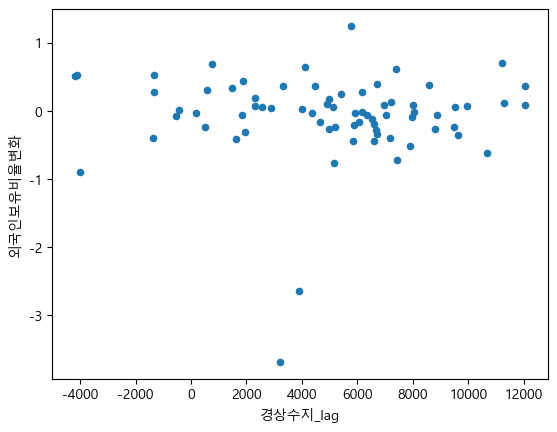

In [40]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
data.plot(kind = 'scatter', x = '경상수지_lag', y = '외국인보유비율변화')

In [41]:
regmodel.params # estimates
regmodel.bse # standard errors
regmodel.predict() # predicted mean responses \hat{\beta}_0 + \hat{\beta}_1x_i
regmodel.fittedvalues # predict()와 유사하나 index가 더 잘 정렬되어 있음
regmodel.get_prediction().summary_frame() # info about mean responses
regmodel.resid # residuals


2018/01    0.433942
2018/02    0.136827
2018/03   -3.614247
2018/04   -0.166615
2018/05    0.405520
             ...   
2023/08    0.715212
2023/09    0.328824
2023/10   -0.084594
2023/11   -0.652801
2023/12   -2.565634
Length: 72, dtype: float64

In [42]:
regmodel.f_test("경상수지_lag = 0") # test H_0 by F statistics
regmodel.f_pvalue # 0.9857530006659048
regmodel.fvalue # 0.00032115585063297324
regmodel.t_test("경상수지_lag = 0") # test H_0 by t statistics
regmodel.pvalues # p values
regmodel.tvalues # Intercept   -0.590299 경상수지_lag    -0.017921

Intercept   -0.590299
경상수지_lag    -0.017921
dtype: float64

In [43]:
regmodel.nobs # 72.0
regmodel.centered_tss # 30.13271262071226, our SST
regmodel.mse_total # 0.42440440310862343, our SST/(nobs-1)
regmodel.ess # 0.00013824646507032412, our SSR(This can be confusing. In ess, e is 'explained')
regmodel.mse_model # 0.00013824646507032412, our SSR/(1)
regmodel.ssr # 30.13257437424719, our SSE(This can be confusing. In ssr, r is 'residual')
regmodel.mse_resid # 0.43046534820353133, our SSE/(nobs-2)
regmodel.rsquared # 4.587919674170493e-06, R^2

4.587919674170493e-06

In [58]:
import statsmodels.stats.api as sm_api
sm_api.anova_lm(regmodel, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
경상수지_lag,1.0,0.000138,0.000138,0.000321,0.985753
Residual,70.0,30.132574,0.430465,NaN,NaN
